Plotting / Data Visualization
==

In the sciences we measure things.  Data visualization tools are critical to understanding and presenting our results.  This notebook and the accompanying code in the repository will review a number of common plotting tasks.  Gnuplot is handy for quick plotting of functions or to display tabulated data, but we will often want to include plot making into our own programs. This this is possible with Gnuplot, better options exist.  Two tools will be presented (1) the common Python [Matplotlib](https://matplotlib.org/) package and (2) the [ROOT](https://root.cern.ch/) data analysis framework which has common APIs for both C++ and Python ([PyROOT](https://root.cern/manual/python/)).  ROOT is primarily used in particle physics and is aimed at applications when very large datasets need to be analyzed.  In this class you can generally use whatever tools you prefer which may be influenced by your research group's tools and personal preferences.  However, there may be cases where some choice is simply better, so be careful not to limit yourself artifically and to keep an open mind to try new tools to find the best one for the job.  It's always a good thing to have more [tools](https://www.explainxkcd.com/wiki/index.php/2510:_Modern_Tools)!


Before we begin here's a quick, very personal, view of the more generic Python approach versus using a dedicated analysis framework like ROOT.  Of course any number of tools can be combined when building your analysis workflows.  **It's a "yes and ?" not and "either-or" situation.**

|  | Common Pythonverse | ROOT Framework |
| --- | --- | --- |
| Python compatibility | obviously! | yes |
| C++ compatibility | WIP | native |
| C/C++ bridging | ctypes/cppyy | internal cppyy | 
| ease of C++<=>Python data passing | good | excellent |
| Plotting | matplotlib, etc | built in |
| Data analysis integrated w/ plots | no | yes |
| Special functions| scipy.special | built in |
| minimizers/optimization | scipy.optimize | built in |
| highly configurable fits| iminuit | built in minuit(2)/roofit |
| integration/ode | scipy.integrate | built in / GSL or Boost |
| statistical analysis | scipy.stats | built in |
| data wrangling | pandas / numpy / uproot | built in |
| standardization of interfaces | meh | very good |
| stability of interfaces | improving | very good |

The [Matlab](https://www.mathworks.com/products/matlab.html) framework includes a varierty of plotting and numerical analysis tools is used in many university course and in industry.  

Import the python interfaces.

In [45]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import random
import math
# the following makes static plots that are viewable in the github notebook renderer.  Comment this line for interactive root plots
%jsroot off  

Simple Graphs
===

When you go through the examplex below, make sure to look up any functions/objects/methods that you are not familiar with.

We begin with a simple graph in Matplotlib using the [plot method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

See also:
* https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

In [46]:
# Generate some random data with associated error bars.
x=np.arange(10,17,0.3)
y=x.copy()+np.random.rand(len(x))
yerr=np.abs(np.random.rand(len(x)))*0.5+0.1

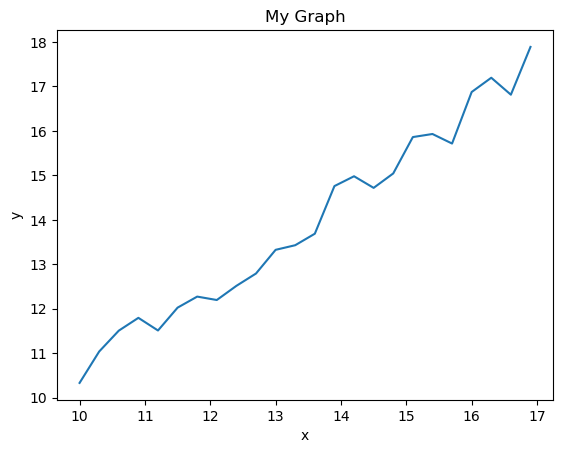

In [47]:
plt.title('My Graph')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y);    # why do I use the optional ; here?

# The purpose of the ";" at the end of the plotting command is to "suppress the output". Honestly, this is the same syntax as MATLAB, which is where matplotlib
# gets its inspiration from. The semicolon is not necessary, but it makes sure that all you see is the plot instead of the plot and a printout showing the line
# objects that created the plot.

The equivalent graph using in ROOT using its Python interface (PyROOT). 

See the [TGraph documentation](https://root.cern.ch/doc/master/classTGraph.html) or [here](https://github.com/cxx-hep/root-cern/blob/master/docbook/users-guide/Graphs.md) for Drawing options.  Here PyROOT is able to interpted the numpy arrays.  The reason we specify the length is that numpy arrays are not standard C++ opbjects.  The PyROOT interfaces is acessing the the location data stored in the computer memory.  The length parameter tells the C++ code how much data to read from that address.  Note that there a rem nya examples for ROOT and Matplotlib avaialble and LLMs are also great references for how to do things.  

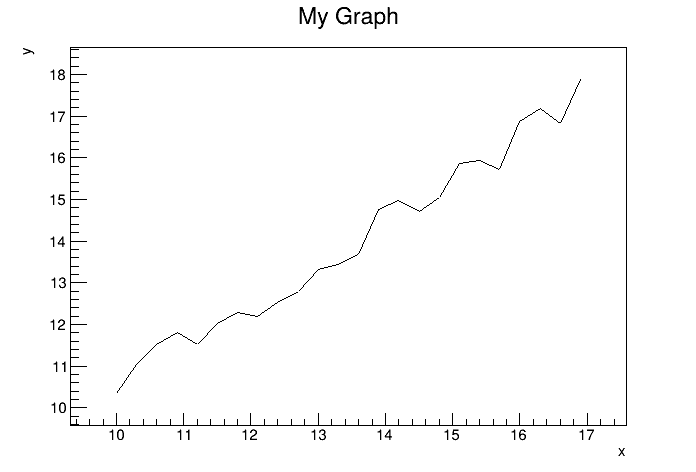

In [48]:
tg=r.TGraph(len(x),x,y) # remember that r stands for ROOT library. make a tgraph object
tc=r.TCanvas()  # create a canvas to hold the plot. make a separate tcanvas object
tg.SetTitle("My Graph;x;y") # give the graph a name
tg.Draw("al")  # draw the plot (on the active canvas). #al# means to draw axes "A" and then simple line plot "L"
tc.Draw()       # draw the canvas. Now, show the canvas with the plot.

The use of canvases may seem like unnecessary extra work, but this allows us to very easily manage multiple plot windows in a single program.

A big difference of the ROOT approach is that our plotting objects are also containers.  We can illustrade this by making the TGraph a different way.

See also:
* https://root.cern/doc/master/classTRandom.html
* https://root.cern/doc/master/classTCanvas.html

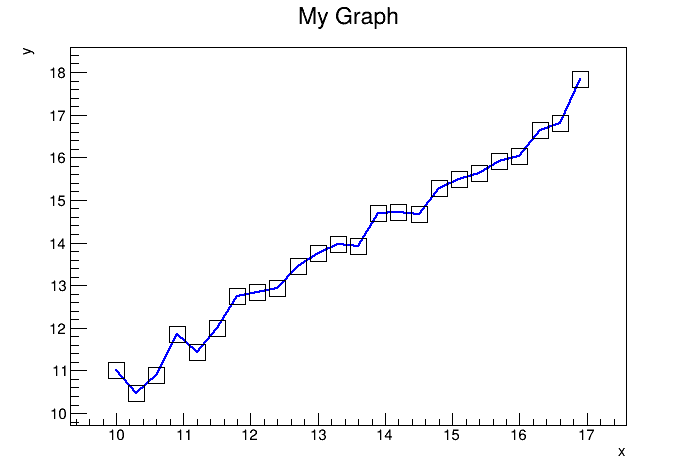

In [49]:
# Generate some random data with associated error bars.
ndata=24
xmin=10
xstep=0.3
rand=r.TRandom3() # basically just creates a random number generator object.
tg=r.TGraph()
tg.SetTitle("My Graph;x;y")
for  i in range(ndata): # gonna loop 24 times, from 0 to 23. 
    xi = xmin + i*xstep # basically doing np.arange but you tell it how many to do in ndata.
    yi = xi + rand.Uniform() # uses earlier RNG with uniform distribution between [1,0)
    tg.SetPoint(i,xi,yi) # plot a point. i is number, xi and yi are a coordinate pair
tc=r.TCanvas()  # not really needed b/c tc already exists # I guess make a new canvas or something
tg.SetLineWidth(2) # just setting some parameters for good looking plot
tg.SetLineColor(r.kBlue)
tg.SetMarkerStyle(r.kOpenSquare)  # https://root.cern.ch/doc/master/classTAttMarker.html #literal marker is a square
tg.SetMarkerSize(2)
tg.Draw("APL") # draw axes, points, then line. for the GRAPH
tc.Draw() # draw everything for the CANVAS (how you visualize it)

Add error bars
---

In Matplotlib, we can use the [errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) method to add errorbars.

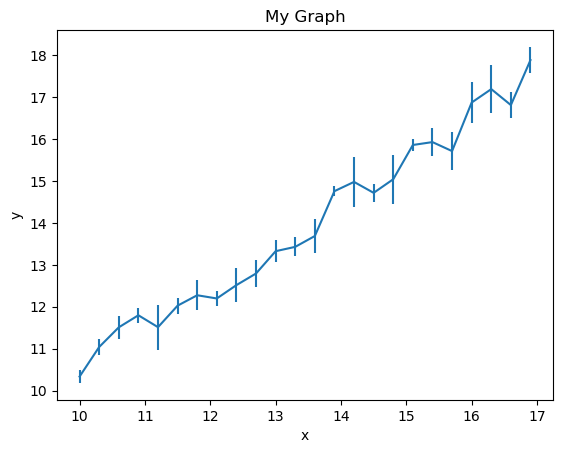

In [50]:
plt.title('My Graph') # note that we're going back to python, not ROOT.
plt.xlabel('x')
plt.ylabel('y')
plt.errorbar(x,y,yerr=yerr); # literally, errorbar makes a lineplot with the error bars specified

The equivalent in ROOT is [TGraphErrors](https://root.cern.ch/doc/master/classTGraphErrors.html)

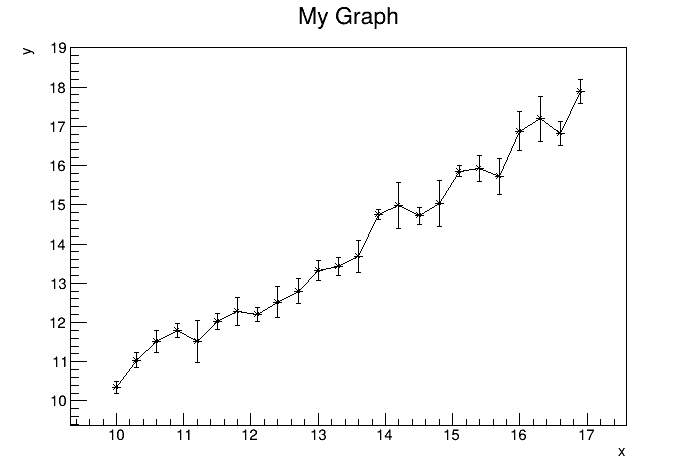

In [51]:
tge=r.TGraphErrors(len(x),x,y,0,yerr) # the 0 is likely the x-axis errors, but we don't have any so make it zero. len, x, y, xerr, yerr is syntax
tge.SetTitle("My Graph;x;y")
tge.Draw("al*") # star is to make each point a star. it's the marker
tc.Draw() # now you can see it

The 1D histogram
===

We frequently use 1D histograms dispaly data distributions.  

Matplotlib [histograms](https://matplotlib.org/stable/gallery/statistics/hist.html)
---

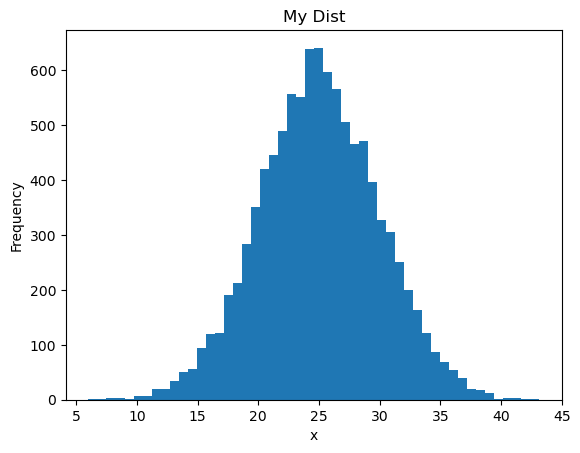

In [52]:
# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801) # seed is random if blank

N_points = 10000 # deciding parameters for our distribution later on
n_bins = 50
mean=25
sigma=5

# Generate a normal distributions
dist = rng.standard_normal(N_points)*sigma+mean #standard_normal has mean 0 and stdev 1.
# or could just do rng.normal(mean, sigma, size = N_points)

# Set the number of bins with the *bins* keyword argument.
plt.title('My Dist')
plt.xlabel('x')
plt.ylabel('Frequency')
bins=plt.hist(dist, bins=n_bins); # just plotting a histogram. dist is just a list of numbers.

ROOT [histograms](https://root.cern/manual/histograms/)
---

Histograms come in many flavors and dimensions in ROOT.  Here we will use the basic TH1F version.  This is a 1D histogram, where the contents of each bin is represented by a floating point number.  Other varieties exist, eg TH1D uses a double to represent bin content, TH1I uses an integer, etc.  

Warning in <TROOT::Append>: Replacing existing TH1: hname (Potential memory leak).


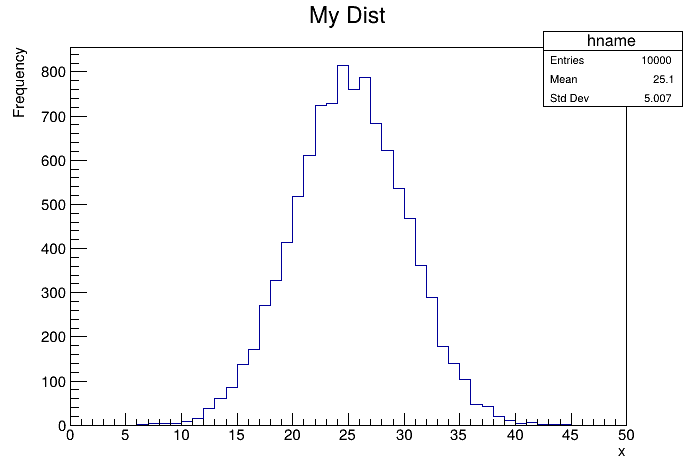

In [53]:
# Create a random number generator with a fixed seed for reproducibility
rand=r.TRandom3(123456) # again adding an optional seed

N_points = 10000
n_bins = 50
mean=25
sigma=5
xmin=0 # need limits to cut off the distribution. It could go on forever?
xmax=50

h=r.TH1F("hname","My Dist;x;Frequency",n_bins,xmin,xmax)  # create a hitogram

for i in range(N_points):   # fill this histogram
    val = rand.Gaus(mean,sigma)    # looks like you make a random number from the Gaussian distribution with mean and sigma. Then, throw it into the histogram!
    h.Fill(val)
h.Draw()
tc.Draw()

Histograms with error bars
---
This is easy with ROOT.  Remember the plotting classes are containers, so they hold information about your data already.   

mean = 25.104828341969714
stddev = 5.0065205283571075


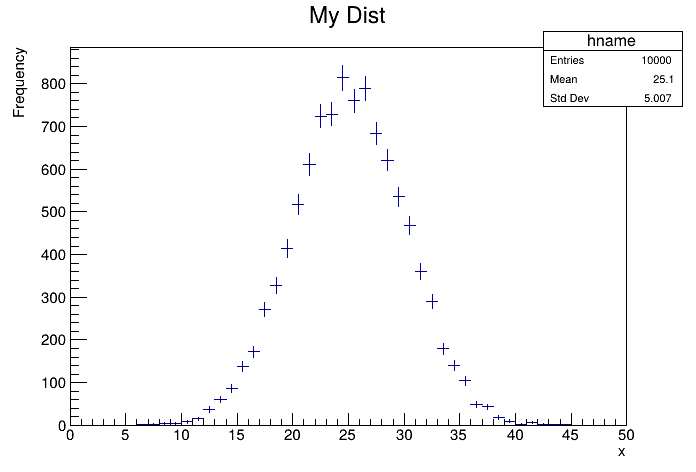

In [54]:
h.Draw("errors")  # or simply h.Draw("e") # just plotting errors, no lines!
tc.Draw()

print(f"mean = {h.GetMean()}")
print(f"stddev = {h.GetStdDev()}") # using the classic python f string


With Matplotlib we have to do all the calulcation for ourselves.  The hist method returns an arrays with the binned content and bin centers, we can use these to calculate error bars.

mean = 25.00670383701274
stddev = 4.9277044966439165


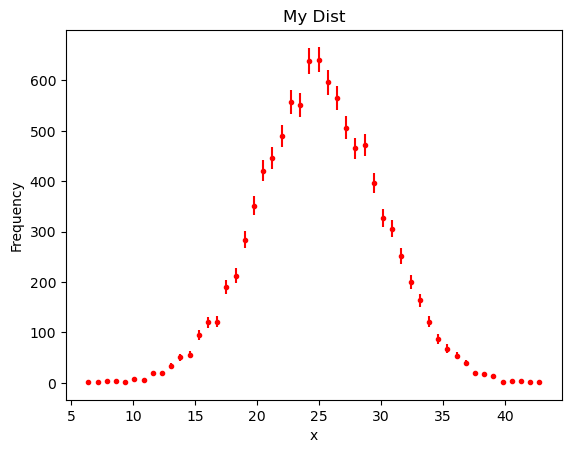

In [55]:
#bins=plt.hist(dist, bins=n_bins) # bins from earlier
yb=bins[0]  # bin edges!
xb=bins[1]  # bin contents
err=np.sqrt(yb)
#Calculate bin centers (you can probably find a smarter way to do this!)
bc=(xb[1:]-xb[:-1])/2+xb[:-1] # first minus last /2 (average) + last???
plt.title('My Dist')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.errorbar(bc, yb, yerr=err, fmt=".", color="r") # now we are basically plotting a scatterplot with errorbars. No lines though
print(f"mean = {np.mean(dist)}")
print(f"stddev = {np.std(dist)}")

Discussion
---

Storing your data in histograms can greatly reduce data volumes.  For example if you generated $10^{12}$ random numbers multiple times for different distributions, you really won't want to be dealing with these huge vectors more than you have to.  A histogram of 200 bins would only require 200 floats, etc to store/display the binned data.

Exercise
===

There are endless varieties of plots that we can discuss.  This exercise will include a number of exerises for plotting data and distributions in a variety of ways.  The goal is to practice plot making and using online documenation and examples to get more proficient at displaying data.  You may use either Matplotlib or ROOT.  You should discuss your approaches with your classmates.  Complete your plots in the notebook cells below.

plotting 1d functions
---

Plot the functions sin(x), cos(x) over the domain [0:4*pi] on a single plot.  See [TF1](https://root.cern.ch/doc/master/classTF1.html) or [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

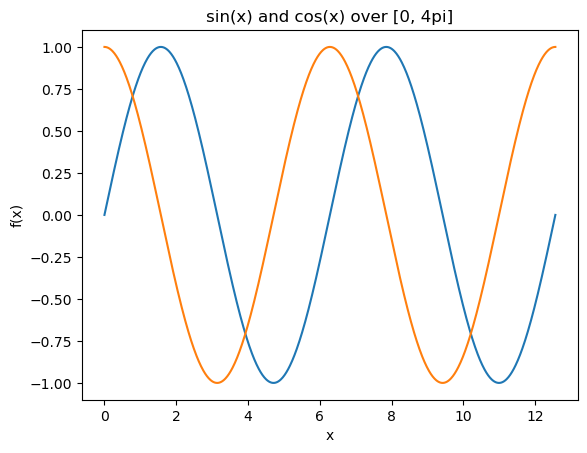

In [56]:
# solution here
# In order to plot a function with either ROOT or matplotlib, we need a series of coordinate pairs to throw into the computer.
# So, that's what we need to do first. Get some x-values and then plug them into the function to get y-values.

from math import pi
from numpy import sin, cos # since numpy sin and cos input numpy arrays, they can just do the calculation for all the 
# elements of the array in one go
# domain = np.arange(0, 4 * pi, 0.01) # actually can't do arange because exclusive of endpoint
domain = np.linspace(0, 4 * pi, 1000) # now we are including the endpoint, but put 1000 points linearly
y1 = sin(domain.copy())
y2 = cos(domain.copy())

# now that we have x and y values, we should just plot them like above.

plt.title('sin(x) and cos(x) over [0, 4pi]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(domain,y1); 
plt.plot(domain, y2);

Plot the functions sin(x), cos(x) over the domain [0:4*pi], but use two 'frames' such that the sign function is in the top frame and the cos function is in the bottom frame

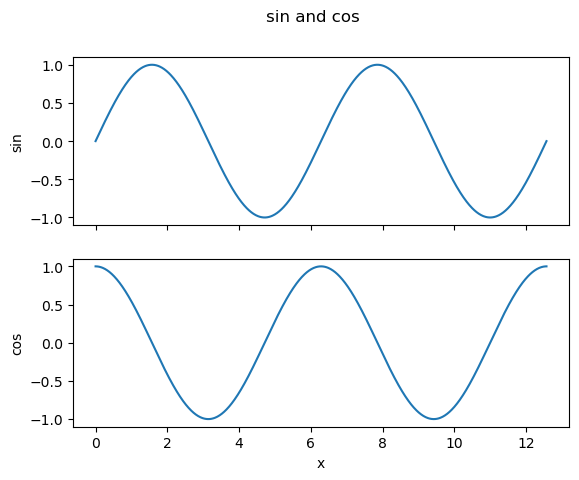

In [57]:
# solution here
# Well, we already have the sets of coordinate pairs for both sin and cos. In this case, I think the easiest way is to use matplotlib subplots.
fig, axes = plt.subplots(2, 1, sharex = True) # might as well have them share the domain
funcs = [y1, y2] # now have a list of lists!
functions = [sin, cos]
for i, ax in enumerate(axes): # instead of coding both, just loop over them. plot at the end
    ax.plot(domain, funcs[i]) # now ax and funcs have the same index
    ax.set_ylabel(functions[i].__name__)
plt.xlabel('x')
plt.suptitle('sin and cos')
plt.show();

# hopefully, this is what you meant by frames!

plotting 2d functions 
---

plot the following function over the domain x: [-5:5] y: [-5:5]

$f(x,y) = -20.0 * exp(-0.2 * \sqrt{0.5 * (x^2 + y^2)}) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20$

Here e is Euler's number = exp(1)

Use two plot panels.  In the upper panel display your plot as a color map.  In the lower panel display your plot as a lego plot.

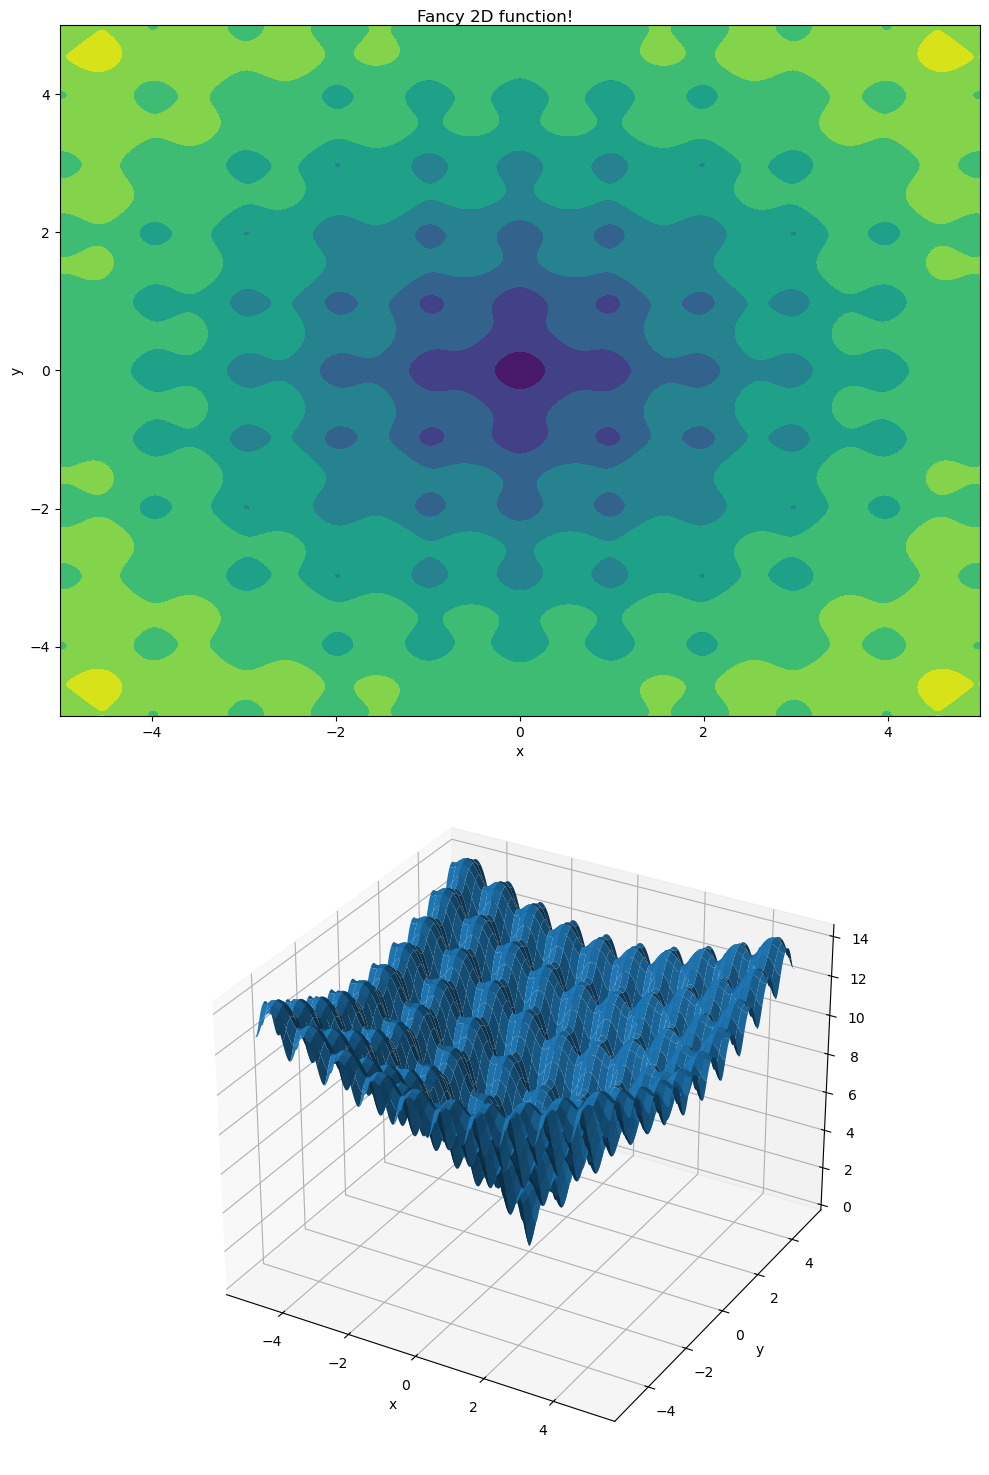

In [58]:
# solution here
# well, let's start by doing the same thing. We need to have a domain for x and for y
xdomain = np.linspace(-5, 5, 1000)
ydomain = xdomain.copy() # not necessary, but helps if we want to change the domain later in life

def f(x, y):
    """
    evaulate f(x,y) at each point (x,y) in numpy array for x and y. return value of f at that series of points
    need x and y to be the same size.
    """
    from numpy import exp, cos, pi, sqrt, e
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x ** 2 + y ** 2) ) ) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y) ) ) + e + 20

# if you want to make a contour plot in matplotlib, you need a "meshmap" or something like that. SO, I need to convert my domains
# to be in the meshmap format
# if you want a "lego plot", this is basically a surface plot. 

X, Y = np.meshgrid(xdomain, ydomain, indexing = 'xy')
Z = f(X, Y)
X.shape, Y.shape, Z.shape
# now make the plot
fig = plt.figure(figsize = (10, 15))
fig.suptitle("Fancy 2D function!")
ax = fig.add_subplot(2, 1, 1) # row column index
ax.contourf(X, Y, Z)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax = fig.add_subplot(2, 1, 2, projection = '3d') # now the second row in the figure!
ax.plot_surface(X, Y, Z)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.tight_layout()
plt.show();

# Later, we could add in nice looking colors or titles and axis labels if we wanted to!

1D histograms
---

Generate three sets of 1000 random numbers:
- set1 = Normal distribution with mean of 5.0 and stdev of sqrt(5)
- set2 = Poisson distribution with mean of 5.0
- set3 = binomial distribution for (n=10, p=0.5)

Display all of these histograms on a single plot.  Clearly labeling your data.

Warning in <TROOT::Append>: Replacing existing TH1: normal (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: poisson (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: binomial (Potential memory leak).


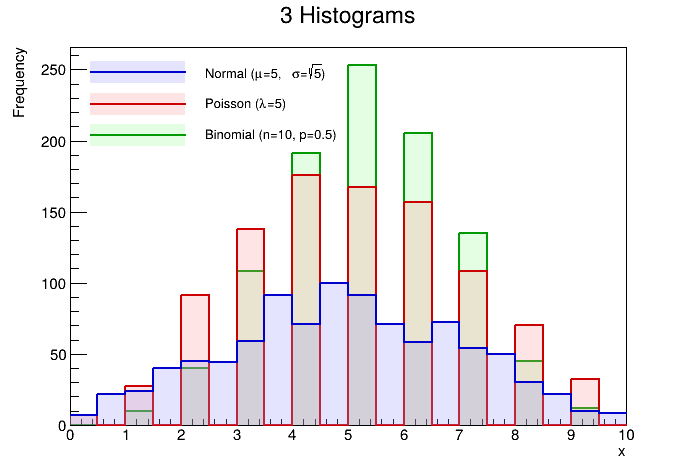

In [60]:
# solution here
# Since it's histograms, I think ROOT will be superior here.

# My original method of just making a random number for each iteration of the
# loop didn't work. I talked with Tristen, and he recommended to just make all
# the random numbers in the beginning. Then, you can just pass them into the
# histograms using looping like before.

N_points = 1000
n_bins = 20
mean=5.
sigma=math.sqrt(5)
xmin=0 # need limits to cut off the distribution.
xmax=10

h1=r.TH1F("normal","Normal;x;Frequency",n_bins,xmin,xmax)  # create a histogram
h2=r.TH1F("poisson","Poisson;x;Frequency",n_bins,xmin,xmax)
# h3=r.TH1F("binomial","Binomial;x;Frequency",n_bins,xmin,xmax) # need to fix the naming...
h3=r.TH1F("binomial","3 Histograms;x;Frequency",n_bins,xmin,xmax)


# Styling (distinct colors + soft fill). From Copilot!
h1.SetLineColor(r.kBlue + 1);   h1.SetLineWidth(2); h1.SetFillColorAlpha(r.kBlue - 9, 0.25)
h2.SetLineColor(r.kRed  + 1);   h2.SetLineWidth(2); h2.SetFillColorAlpha(r.kRed  - 9, 0.25)
h3.SetLineColor(r.kGreen + 2);  h3.SetLineWidth(2); h3.SetFillColorAlpha(r.kGreen - 9, 0.25)

# now to make the random numbers using numpy
# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801) # seed is random if blank

# Generate a normal distributions
normal = rng.normal(mean, sigma, size = N_points)
poisson = rng.poisson(mean, size = N_points)
binomial = rng.binomial(10., .5, size = N_points)

for i in range(N_points):   # fill this histogram
    h1.Fill(normal[i])
    h2.Fill(poisson[i])
    h3.Fill(binomial[i])
    
h3.Draw("HIST")
h2.Draw("HIST SAME")
h1.Draw("HIST SAME")

h3.SetStats(0) # also from Copilot. This is how you get rid of the statistics box in upper right.
# do for each histogram you want

# Legend. Also from Copilot actually.
leg = r.TLegend(0.1, 0.68, 0.88, 0.88)
leg.SetBorderSize(0); leg.SetFillStyle(0); leg.SetTextSize(0.03)
leg.AddEntry(h1, "Normal (#mu=5, #sigma=#sqrt{5})", "lf")
leg.AddEntry(h2, "Poisson (#lambda=5)",              "lf")
leg.AddEntry(h3, "Binomial (n=10, p=0.5)",           "lf")
leg.Draw()

tc.Draw()

repeat with

- set1 = Normal distribution with mean of 10.0 and stdev of sqrt(10)
- set2 = Poisson distribution with mean of 10.0
- set3 = binomial distribution for (n=20, p=0.5)

Warning in <TROOT::Append>: Replacing existing TH1: normal (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: poisson (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: binomial (Potential memory leak).


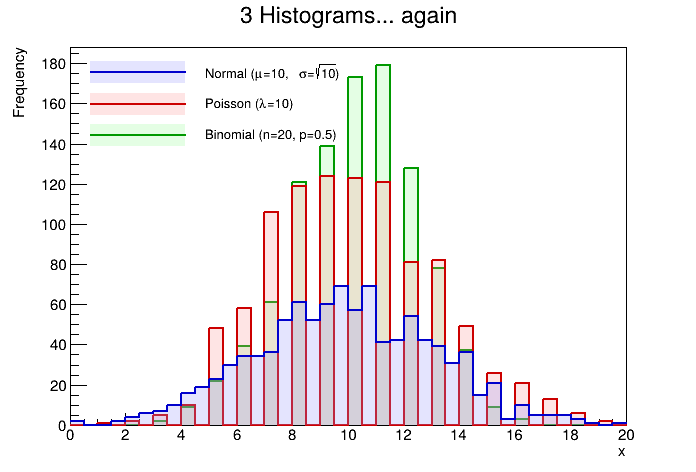

In [61]:
# solution here
N_points = 1000
n_bins = 40
mean=10.
sigma=math.sqrt(10)
xmin=0 # need limits to cut off the distribution.
xmax=20

h1=r.TH1F("normal","Normal;x;Frequency",n_bins,xmin,xmax)  # create a histogram
h2=r.TH1F("poisson","Poisson;x;Frequency",n_bins,xmin,xmax)
# h3=r.TH1F("binomial","Binomial;x;Frequency",n_bins,xmin,xmax) # need to fix the naming...
h3=r.TH1F("binomial","3 Histograms... again;x;Frequency",n_bins,xmin,xmax)


# Styling (distinct colors + soft fill). From Copilot!
h1.SetLineColor(r.kBlue + 1);   h1.SetLineWidth(2); h1.SetFillColorAlpha(r.kBlue - 9, 0.25)
h2.SetLineColor(r.kRed  + 1);   h2.SetLineWidth(2); h2.SetFillColorAlpha(r.kRed  - 9, 0.25)
h3.SetLineColor(r.kGreen + 2);  h3.SetLineWidth(2); h3.SetFillColorAlpha(r.kGreen - 9, 0.25)

# now to make the random numbers using numpy
# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801) # seed is random if blank

# Generate a normal distributions
normal = rng.normal(mean, sigma, size = N_points)
poisson = rng.poisson(mean, size = N_points)
binomial = rng.binomial(20., .5, size = N_points)

for i in range(N_points):   # fill this histogram
    h1.Fill(normal[i])
    h2.Fill(poisson[i])
    h3.Fill(binomial[i])
    
h3.Draw("HIST")
h2.Draw("HIST SAME")
h1.Draw("HIST SAME")

h3.SetStats(0) # also from Copilot. This is how you get rid of the statistics box in upper right.
# do for each histogram you want

# Legend. Also from Copilot actually.
leg = r.TLegend(0.1, 0.68, 0.88, 0.88)
leg.SetBorderSize(0); leg.SetFillStyle(0); leg.SetTextSize(0.03)
leg.AddEntry(h1, "Normal (#mu=10, #sigma=#sqrt{10})", "lf")
leg.AddEntry(h2, "Poisson (#lambda=10)",              "lf")
leg.AddEntry(h3, "Binomial (n=20, p=0.5)",           "lf")
leg.Draw()

tc.Draw()

# now, go back and figure out how to name all of these guys. We want them to have different colors, labels, stuff in the legend, blah, blah, blah...

Generate at least 10000 random numbers according to a Normal distribution the mean=100 and stdev=10.  Plot the results in  a histogram, then overlay the functional form of the Normal distribution with your data.  Be careful to think about the correct noemallization of the Gaussian curve.  This will depend on the number of events you generate and the size of your bins.

Warning in <TROOT::Append>: Replacing existing TH1: normal (Potential memory leak).


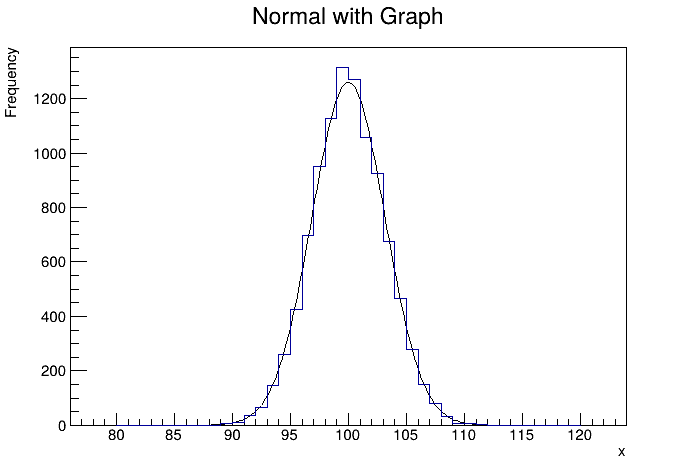

In [82]:
# solution here
N_points = 10000
n_bins = 40
mean=100.
sigma=math.sqrt(10)
xmin=80 # need limits to cut off the distribution.
xmax=120

h1=r.TH1F("normal","Normal with Graph;x;Frequency",n_bins,xmin,xmax)  # create a histogram

rng = np.random.default_rng(19680801)

normal = rng.normal(mean, sigma, size = N_points)
for i in range(N_points):   # fill this histogram
    h1.Fill(normal[i])
    
h1.Draw("HIST")

x = np.linspace(80, 120, 200)
y = N_points*1/(sigma * np.sqrt(2 * np.pi))*np.exp(-0.5*((x.copy() - mean)/(sigma))**2)

tg=r.TGraph(len(x),x,y) # remember that r stands for ROOT library. make a tgraph object
tg.SetTitle("Normal with Graph;x;Frequency") # give the graph a name
tg.Draw("AL")  
h1.Draw("SAME")
tc.Draw()       

Repeat, but show errors bars on your histogram along with the functional form overlay.

Warning in <TROOT::Append>: Replacing existing TH1: normal (Potential memory leak).


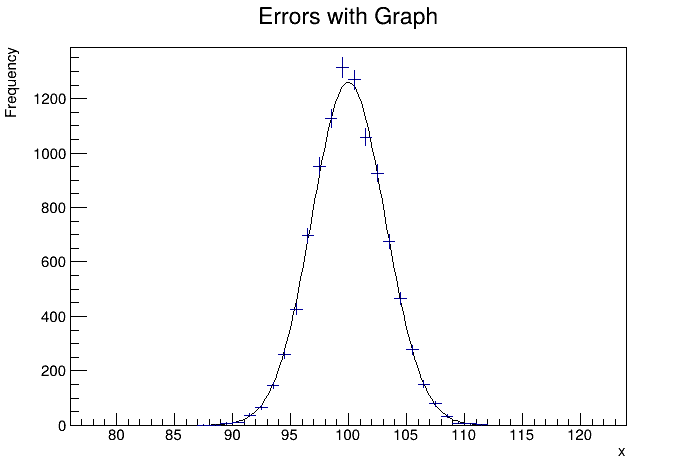

In [84]:
# same code but add the errors!
# solution here
N_points = 10000
n_bins = 40
mean=100.
sigma=math.sqrt(10)
xmin=80 # need limits to cut off the distribution.
xmax=120

h1=r.TH1F("normal","Normal with Graph;x;Frequency",n_bins,xmin,xmax)  # create a histogram

rng = np.random.default_rng(19680801)

normal = rng.normal(mean, sigma, size = N_points)
for i in range(N_points):   # fill this histogram
    h1.Fill(normal[i])

x = np.linspace(80, 120, 200)
y = N_points*1/(sigma * np.sqrt(2 * np.pi))*np.exp(-0.5*((x.copy() - mean)/(sigma))**2)

tg=r.TGraph(len(x),x,y) # remember that r stands for ROOT library. make a tgraph object
tg.SetTitle("Errors with Graph;x;Frequency") # give the graph a name
tg.Draw("AL")  
h1.Draw("e SAME")
tc.Draw()   

2D histograms
---

Generate a set of random numbers in pairs, according to the following:

- x_i is drawn from a Normal distribution with mean of 100, and sigma of 15, eg Gaussian(100,15)
- y_i = Gaussian (x_i,5), eg y is correlated with x

Begin by making a 2d color map (aka heat map) plot showing the density distribution.  Generate enough numbers to make the plot reasonably smooth.

Use two plot panels.  In the upper panel display your plot as a color map.  In the lower panel display your plot as a lego plot.

In [36]:
# solution here
